<a href="https://colab.research.google.com/github/AnnaCanoRifa/test/blob/main/prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
STEP 1: Importar las librerias y datos

** Red Neuronal Convolucional**

Las redes neuronales convolucionales fueron diseñadas para procesar datos en forma de matrices y se han utilizado sobre todo para el procesamiento de imágenes. Son adecuadas para el tratamiento de nuestra base de datos sobre octámeros ya que estos se pueden representar en forma de matrices gracias a la codificación ortogonal

STEP 1: importacion de datos

In [5]:
import numpy as np #importamos numpy y pandas para la manipulación de los datos
import pandas as pd
#importams matplotlib para la visualización de los datos
import matplotlib.pyplot as plt

#importación tensorflow / keras para implementación de ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [14]:
#Importar el archivo del monitor 
from google.colab import files
uploaded = files.upload()





Saving datos.csv to datos (1).csv


In [19]:
pd.read_csv("octameros.csv")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
orthogonal_encod = np.genfromtxt ("./octameros.csv",
                                  delimiter=',', skip_header=1)

octamer_data = np.genfromtxt ("./datos.csv",
                               delimiter=',', skip_header=1)
octamer_data_pd = pd.read_csv ("./datos.csv",
                                  sep=',', header=0, dtype={'V1':'string', 'V2':
'category'})

**STEP 2: Exploración, visualización y preparación de los datos**

Se han importado los octámeros en forma de vectores de 160 elementos integrados en una matriz de 4148x160. No obstante, el input de la red neuronal convolucional se espera que sean matrices por lo que se va a proceder a transformar estos vectores de nuevo en matrices de 8x20 (8 elementos del octámero y 20 posibles aminoácidos).

In [31]:
#Formato de los octámeros tras la importación es un numpy array de 160 elementos:
print("Los oactámeros se han importado con el siguiente formato:", orthogonal_encod[5,].shape)

Los oactámeros se han importado con el siguiente formato: (160,)


In [32]:
print("Por ejemplo:")
print(orthogonal_encod[5,])

Por ejemplo:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
#Generamos las martices de 8x20 a partir de los vectores
#Tras la transformación obtendremos un 3D numpy array: un array que contiene matrices de 8x20
octamers=[orthogonal_encod[0,].reshape([8,20])] #Iniciamoselarray de matrices con la primera matriz

for octamer in orthogonal_encod[1:len(orthogonal_encod)]:
  octamer=[octamer.reshape([8,20])] #Modifica la forma del vector a una matriz 8x20
  octamers=np.append(octamers, octamer, axis =0) #añade las matrices al array

print("")
#Formato de los octámeros tras la transformación:
print("Ahora cada octámero es una matriz con forma:", octamers[5,].shape)
print("por ejemplo:")
print(octamers[5,])



Ahora cada octámero es una matriz con forma: (8, 20)
por ejemplo:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [36]:
print("hemos generado %d matrices." %len(octamers))
print("El formato de nuestros datos en forma de matrices:", octamers.shape)

hemos generado 4149 matrices.
El formato de nuestros datos en forma de matrices: (4149, 8, 20)


Información acerca de los octámeros

In [38]:
#Información acerca del cleavaje site de los octámeros ("0":no produce escisión, "1": produce escisión)
print("Octámeros:")
print(octamer_data_pd.info())


Octámeros:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      4149 non-null   string  
 1   V2      4149 non-null   category
dtypes: category(1), string(1)
memory usage: 36.6 KB
None


In [40]:
print(octamer_data_pd.describe)
display(octamer_data_pd)

<bound method NDFrame.describe of             V1 V2
0     AAAAAPAK  0
1     AAAAPAKV  0
2     AAAELGAR  0
3     AAAPAKVE  0
4     AAAPVAAA  0
...        ... ..
4144  YLDAGLAR  0
4145  YQAKLAEQ  0
4146  YQALDADF  0
4147  YQELLVNQ  1
4148  YSDSFGGD  0

[4149 rows x 2 columns]>


,V1,V2
0,AAAAAPAK,0
1,AAAAPAKV,0
2,AAAELGAR,0
3,AAAPAKVE,0
4,AAAPVAAA,0
...,...,...
4144,YLDAGLAR,0
4145,YQAKLAEQ,0
4146,YQALDADF,0
4147,YQELLVNQ,1


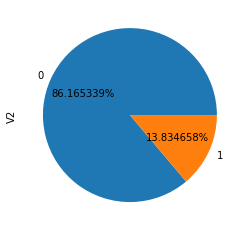

In [41]:
#Visualització
octamer_data_pd["V2"].value_counts().plot.pie(autopct="%-2f%%")

*Training and Test subsets*

Se separan los datos en dos partes, una parte (67%) para realizar el entrenamiento de la red neuronal (training) y la otra parte (33%) para probar la red con datos que no conoce (test).

In [42]:
from sklearn.model_selection import  train_test_split

#Especificamos las etiquetas de cada octámero, será 0 si no tiene cleavaje site y 1 si sí que lo tiene
labels=octamer_data[:,1]
labels=labels.astype("int64")

#Dividimos los datos en un subconjunto para entrenamiento (67%) y un subconjunto de prueba (33%)
#Además, mantenemos por separado los octámeros de las etiquetas

octamer_train, octamer_test, labels_train, labels_test = train_test_split(octamers, labels, test_size=0.33,
random_state=2)

In [43]:
 print ('No de octámeros de entrenamiento:', octamer_train.shape)
print ('Etiquetas para los datos de entrenamiento:', labels_train.shape)
print (' ')
print ('No de octámeros de prueba:', octamer_test.shape)
print ('Etiquetas para los datos de entrenamiento:', labels_test.shape)

No de octámeros de entrenamiento: (2779, 8, 20)
Etiquetas para los datos de entrenamiento: (2779,)
 
No de octámeros de prueba: (1370, 8, 20)
Etiquetas para los datos de entrenamiento: (1370,)


Preprocesado adicional de los datos:
• Se debe convertir nuestras “imágenes” (matrices) de 8 x 20 en matrices de 8 x 20 x 1, ya que es el formato de input de nuestra red neuronal convolucional. La última dimensión que añadimos corresponde a la profundidad o depth y hace referencia al número de cualidades entre las cuales debe distinguir la red (en nuestro caso es 1 porque solamente tiene entre cleavage/no cleavaje, si fueran, por ejemplo, imágenes en color deberíamos especificar un depth de 3 correspondiente con R-G-B):

In [47]:
 octamer_train = octamer_train.reshape(-1, 8,20, 1)
octamer_test = octamer_test.reshape(-1, 8,20, 1)
print("las dimensiones de los arrays de entrenamiento y prueba con los que vamos a alimentar la red son respectivamente:")
octamer_train.shape, octamer_test.shape

las dimensiones de los arrays de entrenamiento y prueba con los que vamos a alimentar la red son respectivamente:


((2779, 8, 20, 1), (1370, 8, 20, 1))

In [48]:
#Nos aseguramos de que estamos trabajando con floats:
octamer_train=octamer_train.astype("float32")
octamer_test=octamer_test.astype("float32")

Por último, las etiquetas que informan acerda de la clase (cleavage/no cleavage) deben estar en formato "one-hot encoding vector". Este es el mismo formato que utilizamos para codificar los octámeros, es decir, se transforman los datos categóricos en datos numéricos creando vectores consistentes en ceros salvo para la clase que representa, que será uno. Como en nuestro estudio solamente tenemos dos clases quedará de la siguiente manera: si la clase es 0 (no cleavage) se codificará como [1,0] y, si la clase es 1 (cleavage), se codificará como [0,1].

In [50]:
#numero de clases
num_classes = 2

#cambiamos las "lebels" de categorical a "one-hot encoding":
labels_train_one_hot=to_categorical(labels_train)
labels_test_one_hot=to_categorical(labels_test)

#visualizamos el cambio:
print('Etiqueta (label) original:', labels_train[10]) 
print('Tras la conversión "one-hot":', labels_train_one_hot[10]) 
print ('\n')
print('Etiqueta (label) original:', labels_train[5])
print('Tras la conversión "one-hot":', labels_train_one_hot[5])


Etiqueta (label) original: 1
Tras la conversión "one-hot": [0. 1.]


Etiqueta (label) original: 0
Tras la conversión "one-hot": [1. 0.]


**STEP 3: Entrenamiento de la red neuronal convolucional**
Arquitectura de la red neuronal

Vamos a generar una red con 2 capas convolucionales:

• Primera: 32 filtros/ventanas de 3x3 

• Segunda: 64 filtros/ventanas de 3x3

Utilizaremos la función de keras Conv2D() ya que estamos tratando con matrices de 2 dimensiones. La función de activación que utilizaremos para estas capas es leaky ReLU. Esta función es similar a ReLU salvo que añade una pequeña pendiente para los valores negativos en lugar de ser pendiente 0. Este tipo de función de activación pretende resolver el problema de las dying ReLU.
Cada capa convolucional se seguirá por una capa de agrupación (pooling) de 2x2, con la función MaxPooling2D(). Esta capa crea una versión condensada de la información contenida en las ven- tanas generadas en la capa convolucional. Se utilizará la técnica “max-pooling” que consiste en seleccionar únicamente el valor máximo de cada ventana de la capa de convolución previa. Esta técnica permite reducir las dimensiones y ayuda a dismiuir el overfitting.
Para finalizar añadiremos una capa densa y, dado que nuestro output es binario, la función de activación de salida será sigmoidea.

In [51]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=(8,20,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='sigmoid'))

**Compilación del modelo**

Utilizaremos el optimizador Adam (Adaptative Moment Estimation) que nos permite adaptar la tasa de aprendizaje y evitar el problema de los mínimos locales. Además, debemos especificar el “loss functión” o la función de pérdida, que tratándose de un clasificador binario será binary cross-entropy. Si especificamos accuracy para la variable “metrics” podremos ver el progreso de la exactitud del modelo a medida que avanza el entrenamiento.



In [52]:
 model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

visualizamos los parámetros del modelo:


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 20, 32)         320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 20, 32)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 10, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 10, 64)         18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 4, 10, 64)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 5, 64)         0         
 2D)                                                    

Modelo de los datos

• Batch size: Generalmente no se introducen todos los datos disponibles juntos en cada it- eración a través de la red neuronal, si no que se seleccionan muestras aleatorias de estos datos. El batch size define el número de muestras que se deben seleccionar de forma aleatoria para cada iteración. Esto permite aumentar la aleatoriedad. He seleccionado un batch size de 60.
• Epoch: Una epoch o época es un ciclo del algoritmo en el que la red ve todas las muestras disponibles una vez. Dado que estamos partiendo los datos en batches y el cálculo del gradiente decreciente es un proceso iterativo, una sola época no es suficiente. Hay que determinar el número de épocas que deseamos que realice nuestra red teniendo en cuenta que a medida que aumenta el número, aumenta el riesgo de overfitting. Mi red neuronal realizará 16 ciclos.
• Val_split Un porcentaje de los datos de train no se usan en el proceso de entrenamiento. Se denominan datos de validación. Se usa para valorar el rendimiento durante el proceso de entrenamiento.

In [54]:
 batch_size = 60
epochs = 16
val_split = 0.2

Entrenamiento del modelo

In [55]:
 x = model.fit(octamer_train, labels_train_one_hot,
          batch_size=batch_size, epochs=epochs,
          verbose=1,
          validation_split= val_split)

Epoch 1/16
38/38 [==============================] - 2s 30ms/step - loss: 0.4326 - accuracy: 0.8489 - val_loss: 0.3714 - val_accuracy: 0.8705
Epoch 2/16
38/38 [==============================] - 1s 25ms/step - loss: 0.3668 - accuracy: 0.8623 - val_loss: 0.3337 - val_accuracy: 0.8705
Epoch 3/16
38/38 [==============================] - 1s 25ms/step - loss: 0.3234 - accuracy: 0.8655 - val_loss: 0.3012 - val_accuracy: 0.8813
Epoch 4/16
38/38 [==============================] - 1s 26ms/step - loss: 0.2774 - accuracy: 0.8848 - val_loss: 0.2677 - val_accuracy: 0.8885
Epoch 5/16
38/38 [==============================] - 1s 26ms/step - loss: 0.2269 - accuracy: 0.9082 - val_loss: 0.2534 - val_accuracy: 0.8903
Epoch 6/16
38/38 [==============================] - 1s 28ms/step - loss: 0.1881 - accuracy: 0.9217 - val_loss: 0.2320 - val_accuracy: 0.8975
Epoch 7/16
38/38 [==============================] - 1s 27ms/step - loss: 0.1609 - accuracy: 0.9384 - val_loss: 0.2695 - val_accuracy: 0.8867
Epoch 8/16
38

Podemos observar que el modelo funciona bastante bien tras 16 épocas ya que tiene una precisión del 99% para los datos de entrenamiento. También podemos ver que se está produciendo overfitting porque la precisión para los datos de validación (val_accuracy) es menor.
Observamos este fenómeno también en los siguientes gráficos. En el eje x se marcan las épocas y el el eje y la exactitud/accuracy (primer gráfico) o la pérdida (segundo gráfico). La exactitud/accuracy para los datos de testing aumenta junto con la de los datos de entrenamiento hasta la cuarta o quinta época, a partir de la cual la exactitud para los datos de validación se estanca. El mismo fenómeno se observa con los datos de “loss”. Esto es un signo de overfitting ya que el modelo está memorizando los datos.

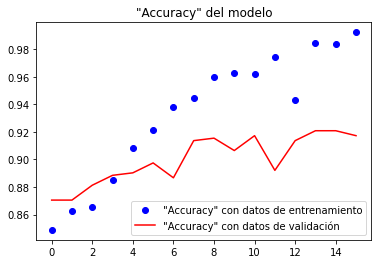

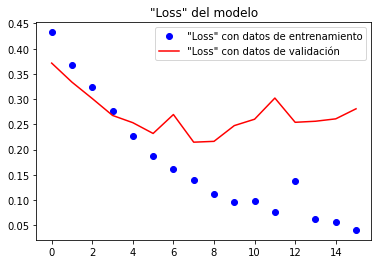

In [57]:
accuracy = x.history['accuracy']
val_accuracy = x.history['val_accuracy']
loss = x.history['loss']
val_loss = x.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='"Accuracy" con datos de entrenamiento')
plt.plot(epochs, val_accuracy, 'r', label='"Accuracy" con datos de validación')
plt.title('"Accuracy" del modelo')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='"Loss" con datos de entrenamiento')
plt.plot(epochs, val_loss, 'r', label='"Loss" con datos de validación')
plt.title('"Loss" del modelo')
plt.legend()
plt.show()